# Problem Definition

The dataset is related to a telecommunication provider and its customers. The customers leaving this provider aka "churn rate" is high and hence the provider wants to predict which of its customers would leave the provider in future. <br>

The objective is to predict whether a customer will change telecommunications provider or not.

# Results

Evaluation Metric Choosen : f1 score (Reasoning for this scoring metric given in cell after naive model code)
    
    
Naive Model Scorel: 0.24
    
    
    
-Best Model: XGBoost (Cost Sensitive Algorithm)<br>

    Note: Though final model selection with voting classifier and XG Boost with oversampling gave the same cv of 80%, XGBoost with class weight= balanced was choosed as the best model since it was a simple algorithm compared to others
        
- Mean Cross validation score of Best model <br>
<b>The Mean Cross validation score of  : 0.80


- Test score of best model <br>
The test score of best model- : 0.96



- Train score of best model <br>
The train score of best model-   :0.82
    
    
   

- Best Model parameters- XG Boost parameters:  'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1
    

# Exploratory Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats
%matplotlib inline

# for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine import discretisers as dsc
from feature_engine import outlier_removers as outr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# for the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# for scoring
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

# ensembling Algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import GradientBoostingClassifier

In [71]:
!pip install imblearn

In [72]:
pip install imblearn==0.0

Note: you may need to restart the kernel to use updated packages.


In [143]:
# for unbalanced dataset
from sklearn.model_selection import RepeatedStratifiedKFold

# for oversampling to ensure balanced datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import VotingClassifier

## Loading Dataset

In [2]:
data = pd.read_csv('Customer Churn .csv')

# Getting rows, cols in dataset
data.shape

(4250, 20)

 <b> <font color='purple'> ** The dataset contains 4250 rows and 20 columns. There are 19 predictor variables and 1 target variable <b> </font>

In [3]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,NaN,299.4,71.0,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,NaN,166.7,113.0,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24.0,218.2,88.0,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


 <b> <font color='purple'> ** Our target variable 'churn' is in binary form with Yes/No values. This can be converted to 0 and 1 for easy working

In [4]:
columns = ['churn']
for col in columns:
    data[col] = data[col].map({'yes':1, 'no':0})

In [5]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,NaN,299.4,71.0,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,NaN,166.7,113.0,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24.0,218.2,88.0,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


 <b> <font color='purple'> ** We see that our target variable 'churn' values are replaced with 0s and 1s

## Variable Description 

1. "state", string. 2-letter code of the US state of customer residence
2. "account_length", numerical. Number of months the customer has been with the current telco provider
3. "area_code", string="area_code_AAA" where AAA = 3 digit area code.
4. "international_plan", (yes/no). The customer has international plan.
5. "voice_mail_plan", (yes/no). The customer has voice mail plan.
6. "number_vmail_messages", numerical. Number of voice-mail messages.
7. "total_day_minutes", numerical. Total minutes of day calls.
8. "total_day_calls", numerical. Total day calls.
9. "total_day_charge", numerical. Total charge of day calls.
10. "total_eve_minutes", numerical. Total minutes of evening calls.
11. "total_eve_calls", numerical. Total evening calls.
12. "total_eve_charge", numerical. Total charge of evening calls.
13. "total_night_minutes", numerical. Total minutes of night calls.
14. "total_night_calls", numerical. Total number of night calls.
15. "total_night_charge", numerical. Total charge of night calls.
16. "total_intl_minutes", numerical. Total minutes of international calls.
17. "total_intl_calls", numerical. Total number of international calls.
18. "total_intl_charge", numerical. Total charge of international calls
19. "number_customer_service_calls", numerical. Number of calls to customer service
20. "churn", (yes/no). Customer churn - target variable.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            3746 non-null float64
total_day_minutes                4250 non-null float64
total_day_calls                  4213 non-null float64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4217 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls       

 <b> <font color='purple'> ** The dataset contains both numerical and categorical values. The predictors with data types int64, float64 are numerical and those with data type object are categorical in nature

In [7]:
#Checking for null values in dataset
data.isnull().sum()

state                              0
account_length                     0
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            504
total_day_minutes                  0
total_day_calls                   37
total_day_charge                   0
total_eve_minutes                  0
total_eve_calls                    0
total_eve_charge                   0
total_night_minutes                0
total_night_calls                  0
total_night_charge                33
total_intl_minutes                 0
total_intl_calls                   0
total_intl_charge                  0
number_customer_service_calls      0
churn                              0
dtype: int64

In [8]:
data.isnull().sum().sum()

574

In [9]:
Missing = 100*(data.isnull().sum().sum()/ len(data))
print(f'Missing values Percentage: {Missing} %')


Missing values Percentage: 13.505882352941176 %


<font color='purple'>  <b>  ** Missing Values:<br>
   
    13.5% of the values in the dataset are missing.
    Missing values are present in the following columns and hence needs to be imputed.
      1. number_vmail_messages
      2. total_day_calls 
      3. total_night_charge

In [10]:
# Getting Column names
[data.columns]

[Index(['state', 'account_length', 'area_code', 'international_plan',
        'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn'],
       dtype='object')]

In [11]:
# Segregating predictors into groups for analysis

continuous = [
    var for var in data.columns if data[var].dtype != 'O' 
    and var not in 'churn'
]

categorical = [var for var in data.columns if var not in continuous ]

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 15 continuous variables
There are 5 categorical variables


 <b> <font color='purple'> ** The dataset is segregated into two groups continuous(numerical predictors) and categorical based on the datatype of predictors for further analysis

In [12]:
# Summary table of dataset
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,3746.000000,4250.000000,4213.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4217.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,8.658569,180.259600,99.892001,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.026369,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,14.001662,54.012373,19.857839,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265871,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.530000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,21.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


<font color='purple'>  <b>  ** Summary table:<br>
    
    We see that predictors like "number_customer_service_calls" have values between 0 and 9, whereas predictors like "total_eve_minutes" have values between 165 to 400 which indicates the need of scaling

## Target Variable- Analysis

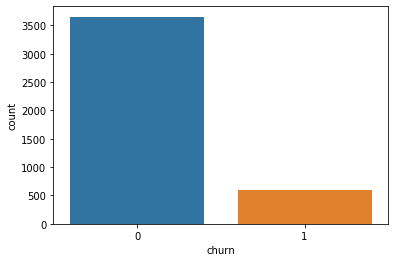

In [13]:
sns.countplot('churn', data=data)

In [14]:
data.churn.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [15]:
freq_churn = 100*(data['churn'].value_counts() / len(data))
print(freq_churn.map('{:,.3f} %'.format))

0    85.929 %
1    14.071 %
Name: churn, dtype: object


<font color='purple'>  <b>  ** Imbalanced Dataset:<br>
   
    This indicates that the dataset is IMBALANCED with the minority class of customers leaving the provider being 14% and the majority class at 86%. Here our interest is on the minority class as the telecom providers wants to predict the customers who would be leaving them

## Continuous Variable- Analysis

In [16]:
continuous

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [17]:
# correlation Matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1,-0.00764589,-0.00161156,0.0216842,-0.00161345,-0.0103258,0.00553543,-0.0103218,-0.00991613,-0.00184637,-0.0104308,0.00453875,0.0136905,0.00449433,0.00100223,0.0193785
number_vmail_messages,-0.00764589,1,0.00446885,-0.00553889,0.00446248,0.00991707,0.00408717,0.00992984,0.0202934,0.00322957,0.0214003,0.00223191,0.00939847,0.00226971,-0.019171,-0.10886
total_day_minutes,-0.00161156,0.00446885,1,0.00208645,1,-0.013248,0.00598583,-0.0132583,0.0100491,-0.00481221,0.00966988,-0.0213691,0.00385851,-0.0212912,-0.00292456,0.215272
total_day_calls,0.0216842,-0.00553889,0.00208645,1,0.00208995,0.00898682,0.003252,0.00898955,0.00336173,-0.00500288,0.00213136,0.00588214,0.00773033,0.00595885,-0.0142564,0.0121799
total_day_charge,-0.00161345,0.00446248,1,0.00208995,1,-0.0132471,0.00598509,-0.0132575,0.0100532,-0.00481568,0.00967316,-0.0213742,0.0038535,-0.0212963,-0.00293178,0.215263
total_eve_minutes,-0.0103258,0.00991707,-0.013248,0.00898682,-0.0132471,1,0.00310081,1,-0.0140181,0.0119732,-0.013905,-0.00350948,0.0122388,-0.00346043,-0.0100631,0.0788552
total_eve_calls,0.00553543,0.00408717,0.00598583,0.003252,0.00598509,0.00310081,1,0.00311972,0.00842519,-0.0119288,0.00867593,-0.0130959,0.00494942,-0.0131453,0.0069563,-0.00681668
total_eve_charge,-0.0103218,0.00992984,-0.0132583,0.00898955,-0.0132575,1,0.00311972,1,-0.0140225,0.0119714,-0.0139094,-0.00351191,0.0122394,-0.00346289,-0.0100708,0.0788516
total_night_minutes,-0.00991613,0.0202934,0.0100491,0.00336173,0.0100532,-0.0140181,0.00842519,-0.0140225,1,0.0238147,0.999999,-0.000112821,-0.0242796,-4.70152e-05,-0.0137711,0.0466472
total_night_calls,-0.00184637,0.00322957,-0.00481221,-0.00500288,-0.00481568,0.0119732,-0.0119288,0.0119714,0.0238147,1,0.0246271,0.00109291,0.00385079,0.00105394,-0.00889315,-0.0126991


<font color='purple'>  <b>  ** Correlation matrix indicates the following:
    Highly correlated predictors<br>
    1. total_day_minutes and total_day_charge
    2. total_eve_minutes and total_eve_charge
    3. total_night_minutes and total_night_charge
    4. total_intl_minutes and total_intl_charge
    
   It is obvious that these are correlated as charge/bill value always depends on the minutes of call. <br>
   None of the predictors have high negative correlation.
   
   
   
     Predictors that are highly correlated with the target variable "churn":
    1. total_day_minutes 
    2. total_day_charge
    3. Number of customer service calls
   
   

In [18]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

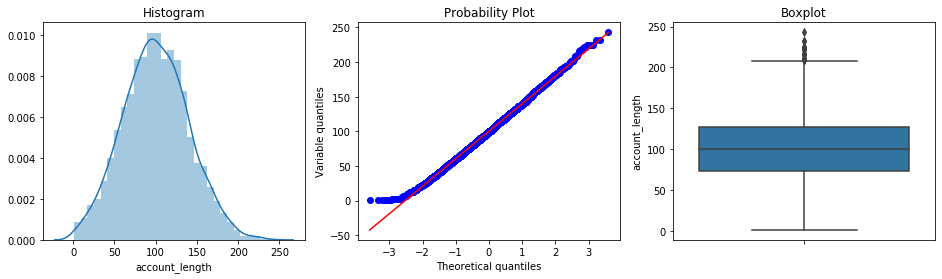

C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\

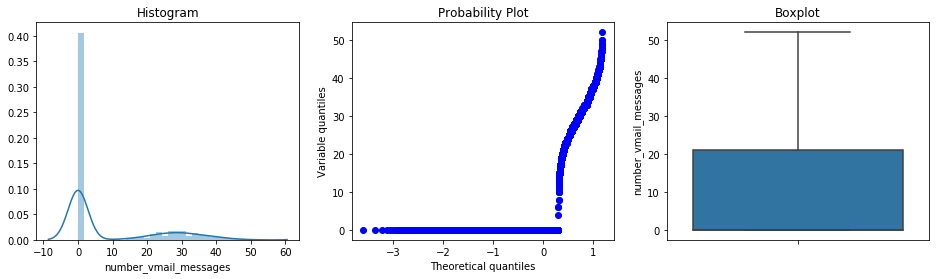

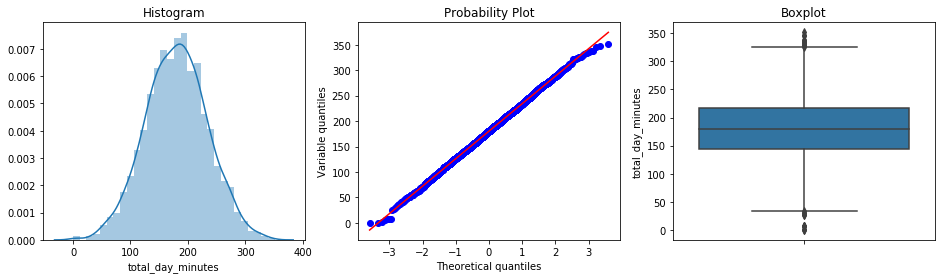

C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\

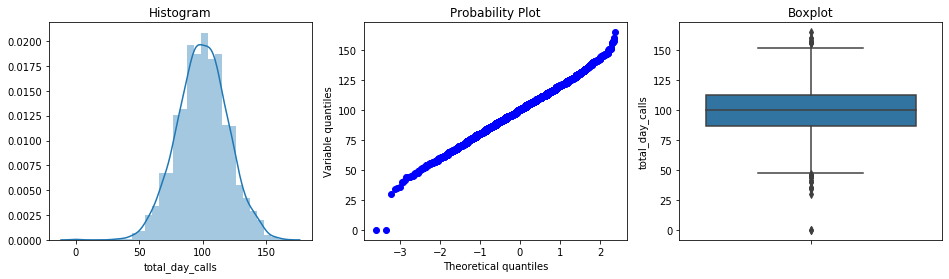

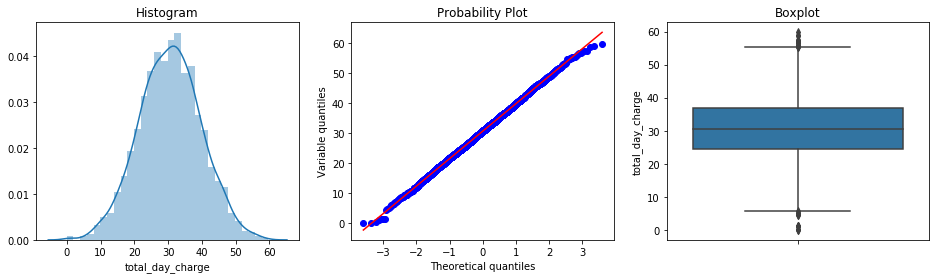

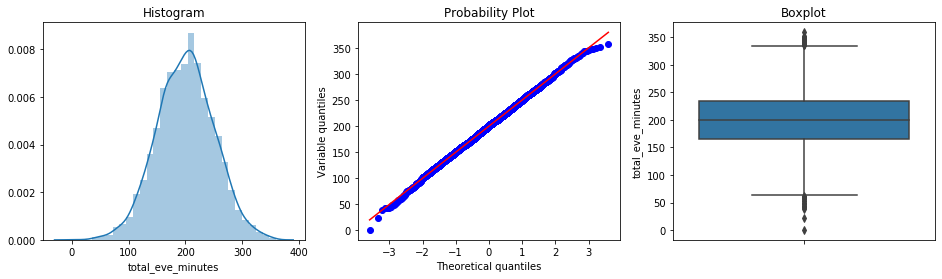

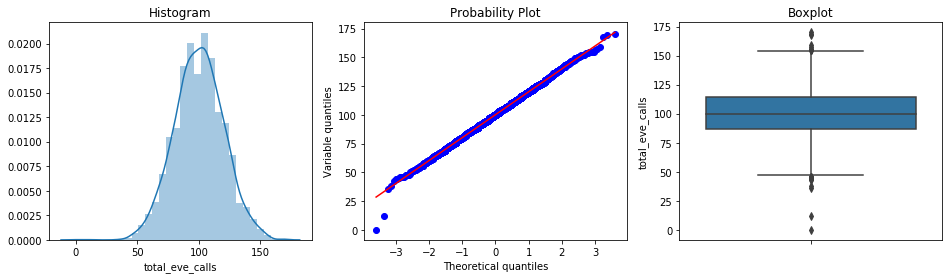

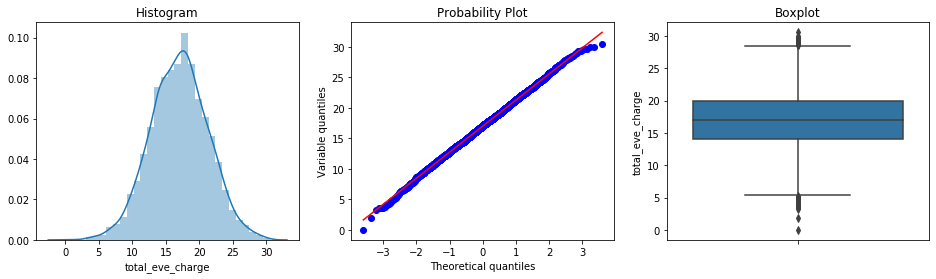

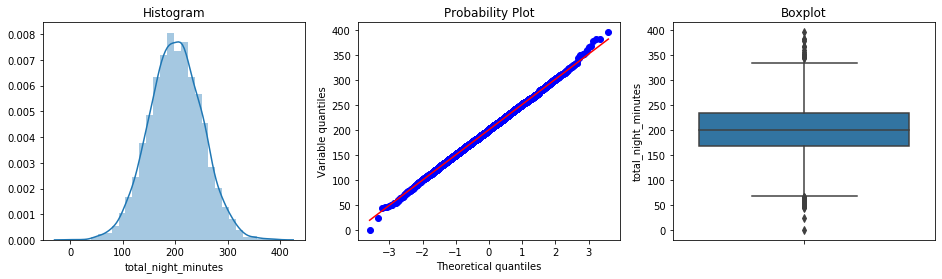

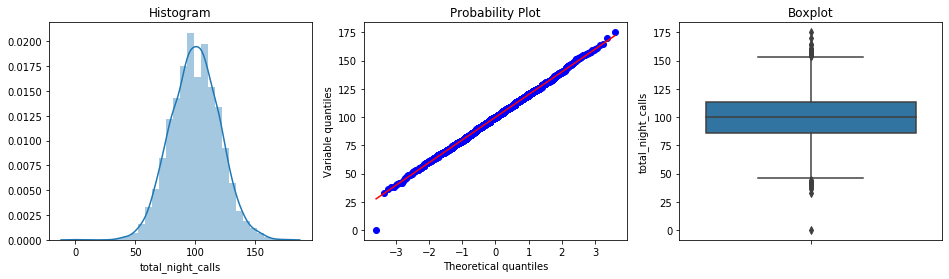

C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sindu\.conda\envs\buan6341_2020\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\

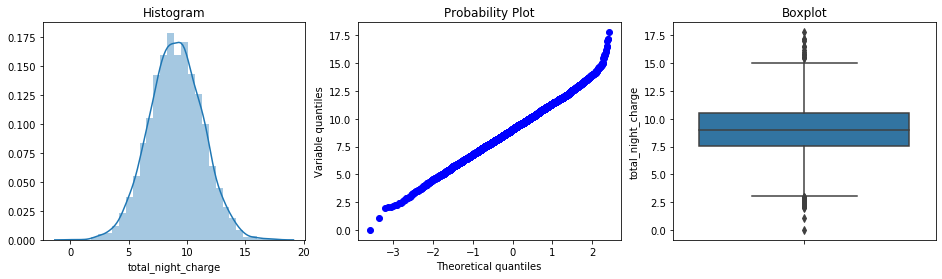

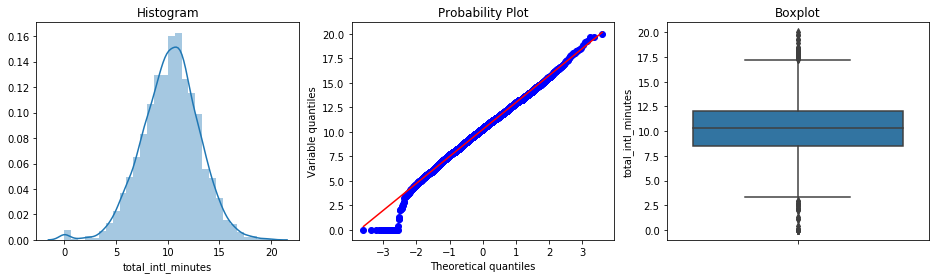

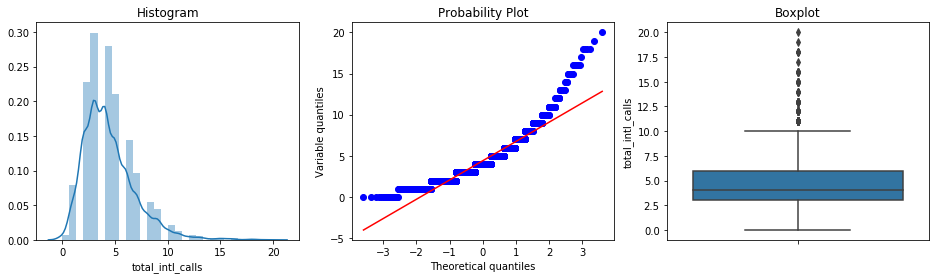

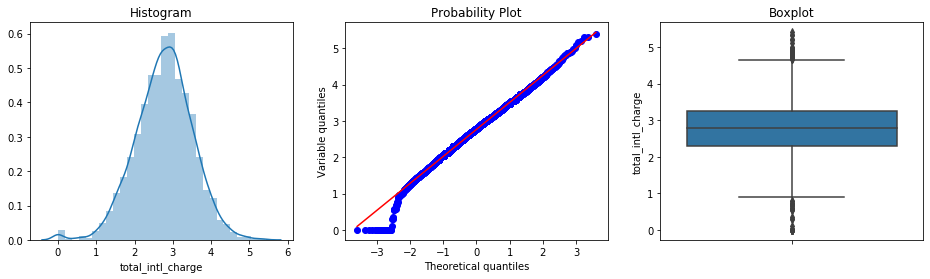

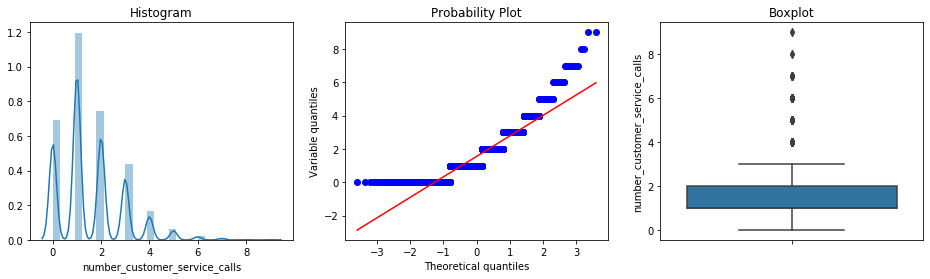

In [19]:
for variable in continuous:
    diagnostic_plots(data, variable)

<font color='purple'>  <b> **  Histogram and QQ Plots indicate that:
    1. Majority of the predictors are normal in distribution 
    2. Predictor number_vmail_messages can be discretised 
    3. total_intl_minutes,total_intl_charge should be checked if it gives better results if discretised
    4. total_day_calls is left skewed and has outliers

In [20]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

In [21]:
outliers_dict={}
for var in continuous:
    upper_boundary, lower_boundary = find_boundaries(data, var,1.5)
    outliers = np.where(data[var] > upper_boundary, True,
                    np.where(data[var] < lower_boundary, True, False))
    outliers_dict[var]=data.loc[outliers, var]  
    

In [22]:
for key, value in outliers_dict.items():
    print(key, outliers_dict[key].count(),outliers_dict[key].min(),outliers_dict[key].max())

account_length 20 209 243
number_vmail_messages 0 nan nan
total_day_minutes 25 0.0 351.5
total_day_calls 28 0.0 165.0
total_day_charge 26 0.0 59.76
total_eve_minutes 34 0.0 359.3
total_eve_calls 24 0 170
total_eve_charge 34 0.0 30.54
total_night_minutes 37 0.0 395.0
total_night_calls 33 0 175
total_night_charge 36 0.0 17.77
total_intl_minutes 62 0.0 20.0
total_intl_calls 100 11 20
total_intl_charge 62 0.0 5.4
number_customer_service_calls 335 4 9


<font color='purple'>  <b> ** Outliers<br>
    
    
    Predictors "total_intl_calls" and "number_customer_service_calls" have high percentage of outliers

Text(0.5, 0, 'Number of calls to custmer service')

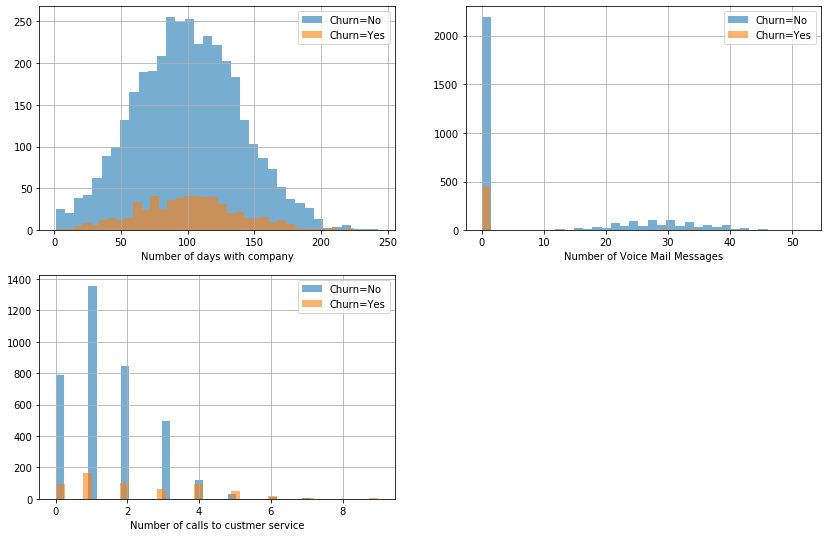

In [23]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.churn == 0].account_length.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].account_length.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of days with company')

plt.subplot(3, 2, 2)
data[data.churn == 0].number_vmail_messages.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].number_vmail_messages.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Voice Mail Messages')

plt.subplot(3, 2, 3)
data[data.churn == 0].number_customer_service_calls.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].number_customer_service_calls.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of calls to custmer service')


<font color='purple'> <b> ** From these Histogram of "Number of Voice Mail Messages",we understand that
     1. People with no voice mail messages have left the telecom provider. We can look at this with different perspectives.
    
       a. Higher churn rate with no voice mails might be a coincidence or
       b. These people could have no set up the voice mail box and hence didn't receive voice mail messages or
       c. These people were in a plan with the provider that did not offer voice mail setup and majority of customers who left the provider belong to this plan
    
<font color='purple'> <b> ** From these Histogram of "Number of calls to custmer service" we see that
    2. Customer churn rate has increased with the number of calls to the customer service. These customers might have called the customer service
 
       a. To register a complaint
       b. Request for a facility
       c. To know about information on various plans

Text(0.5, 0, 'Charges during Day')

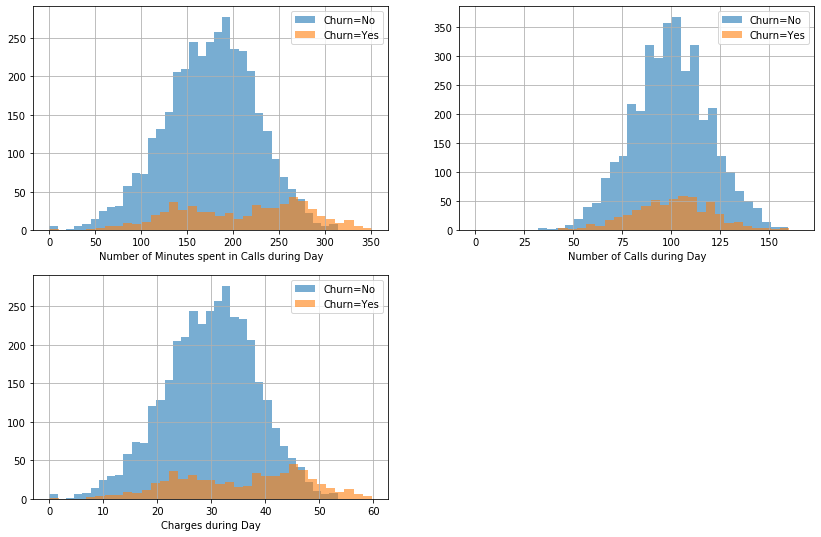

In [96]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 2, 1)
data[data.churn == 0 ].total_day_minutes.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_day_minutes.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Minutes spent in Calls during Day')

plt.subplot(3, 2, 2)
data[data.churn == 0].total_day_calls.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_day_calls.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Calls during Day')


plt.subplot(3, 2, 3)
data[data.churn == 0].total_day_charge.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_day_charge.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Charges during Day')



<font color='purple'> <b> ** Insights: <br>
    
 From these Histogram of "Charges during Day",we see that higher the charges, higher the churn rate. 
    
     This might be bacause customers would have realized they need better plans that would provide them with more call minutes for less price. This might have caused them to quit this provider and move to a different one whose plans might better suit their needs.

Text(0.5, 0, 'Charges for evening calls')

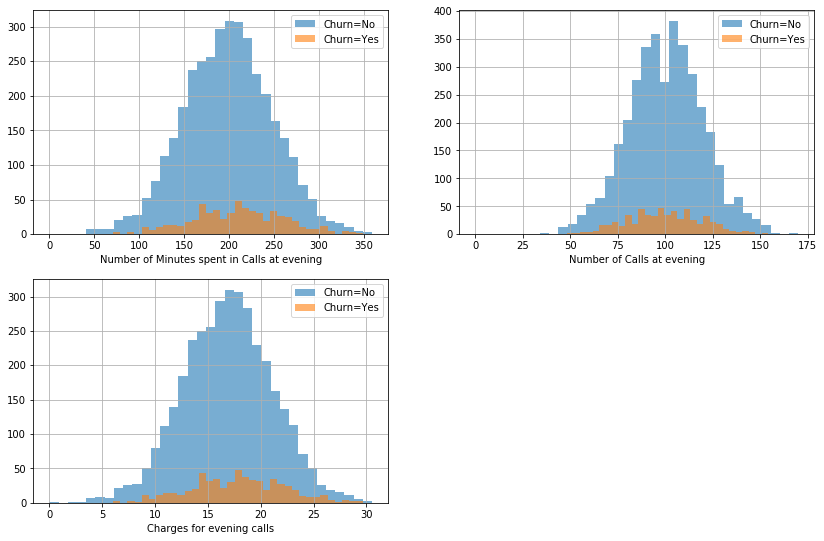

In [97]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.churn == 0].total_eve_minutes.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_eve_minutes.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Minutes spent in Calls at evening')

plt.subplot(3, 2, 2)
data[data.churn == 0].total_eve_calls.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_eve_calls.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Calls at evening')


plt.subplot(3, 2, 3)
data[data.churn == 0].total_eve_charge.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_eve_charge.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Charges for evening calls')


Text(0.5, 0, 'Charges for nyt calls')

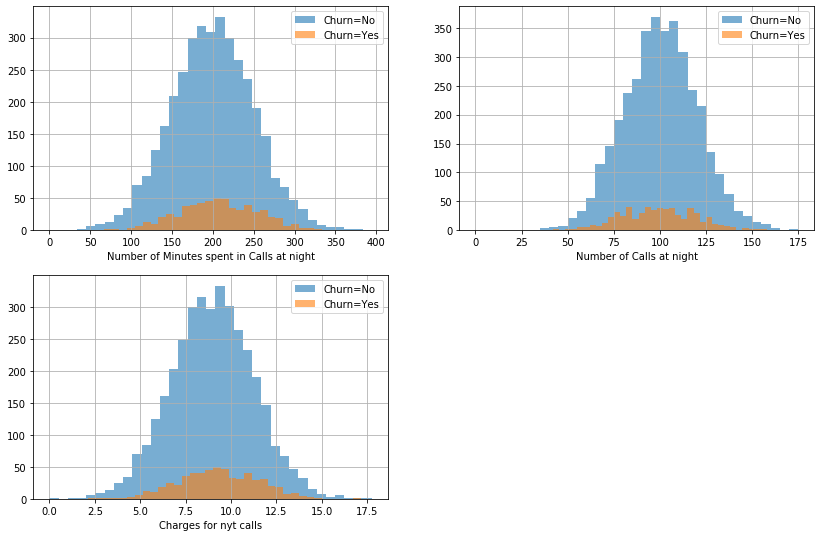

In [98]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.churn == 0].total_night_minutes.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_night_minutes.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Minutes spent in Calls at night')

plt.subplot(3, 2, 2)
data[data.churn == 0].total_night_calls.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_night_calls.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Calls at night')


plt.subplot(3, 2, 3)
data[data.churn == 0].total_night_charge.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_night_charge.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Charges for nyt calls')

Text(0.5, 0, 'Charges for Intl calls')

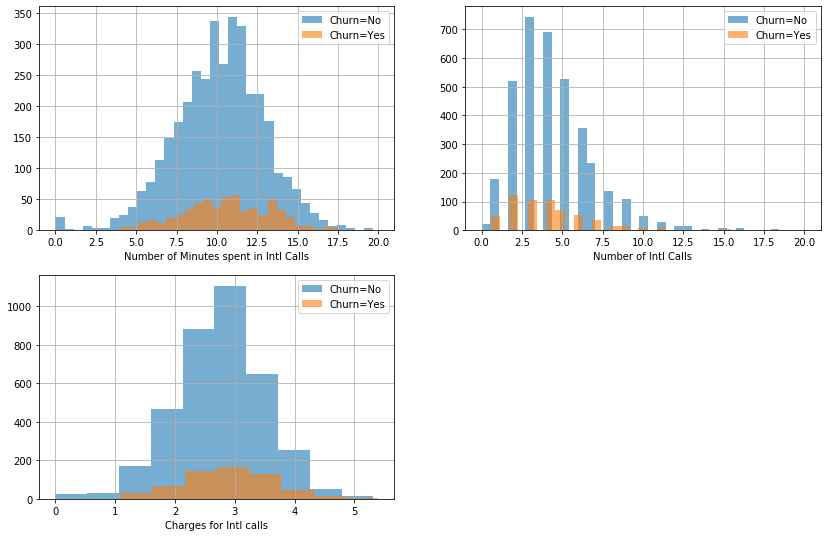

In [99]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.churn == 0].total_intl_minutes.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_intl_minutes.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Minutes spent in Intl Calls')

plt.subplot(3, 2, 2)
data[data.churn == 0].total_intl_calls.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_intl_calls.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of Intl Calls')


plt.subplot(3, 2, 3)
data[data.churn == 0].total_intl_charge.hist(bins=10, alpha=0.6, label='Churn=No')
data[data.churn == 1].total_intl_charge.hist(bins=10, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Charges for Intl calls')



## Categorical Variable- Analysis

In [24]:
categorical

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [25]:
# Listing Categorical variables
for var in categorical:
    print(var, data[var].unique(), '\n')

state ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND'] 

area_code ['area_code_415' 'area_code_408' 'area_code_510'] 

international_plan ['no' 'yes'] 

voice_mail_plan ['yes' 'no'] 

churn [0 1] 



 <b> <font color='purple'> ** Cardinality of categorical variables:
    
    Cardinal values in each of the categorical predictor is listed above. Cardinality refers to the number of unique categories in each variable.

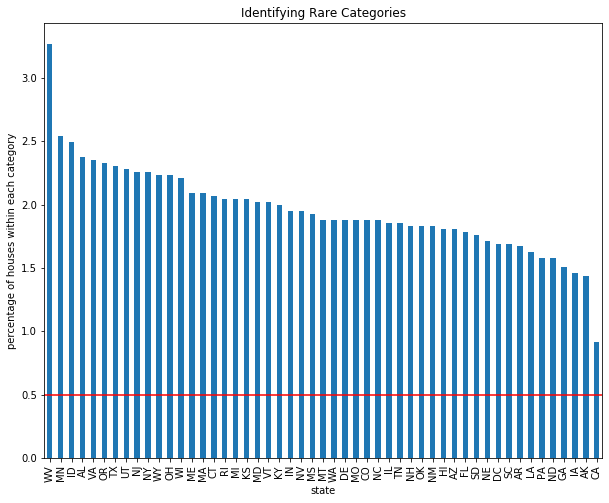

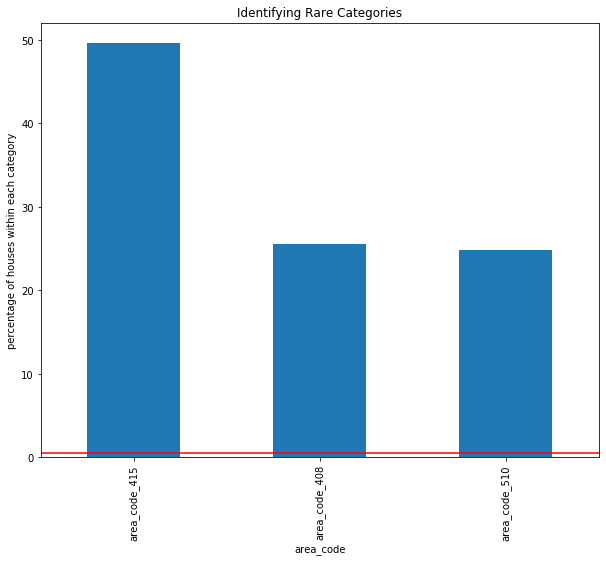

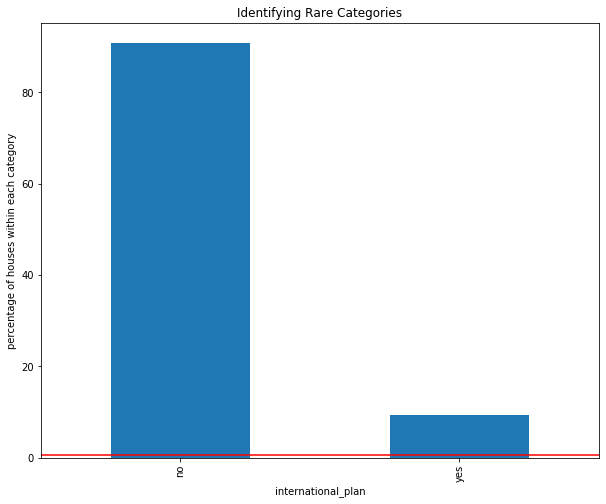

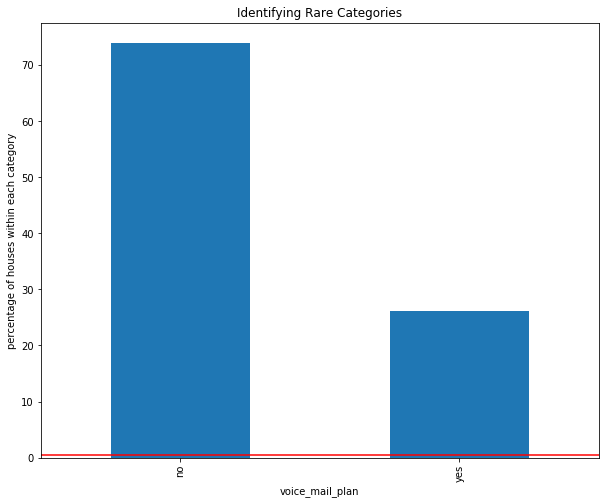

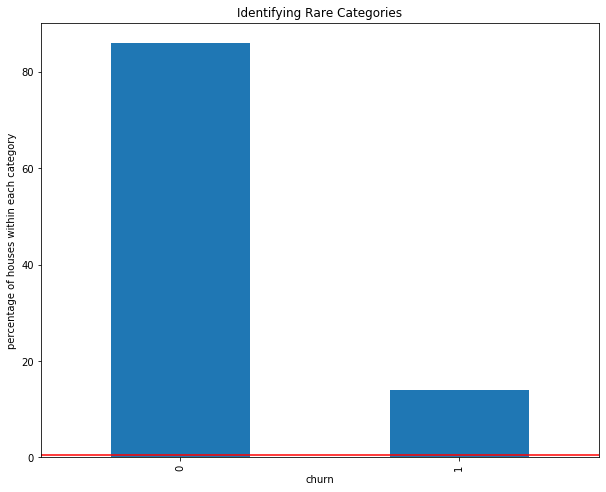

In [26]:
# Rare categories in categorical variables

for var in categorical:
    freq_var = 100*(data[var].value_counts() / len(data))
    # let's make plot with the category frequencies
    plt.figure(figsize=(10, 8))
    fig = freq_var.sort_values(ascending=False).plot.bar()

    # add a line to signal 5 % frequency limit
    # under which we will consider a category as rare
    fig.axhline(y=0.5, color='red')
    
    # add axis labels and title
    fig.set_ylabel('percentage of houses within each category')
    fig.set_xlabel(var)
    fig.set_title('Identifying Rare Categories')
    plt.show()

In [27]:
freq_UMC = 100*(data['state'].value_counts() / len(data))
print(freq_UMC.map('{:,.3f} %'.format))

WV    3.271 %
MN    2.541 %
ID    2.494 %
AL    2.376 %
VA    2.353 %
OR    2.329 %
TX    2.306 %
UT    2.282 %
NJ    2.259 %
NY    2.259 %
WY    2.235 %
OH    2.235 %
WI    2.212 %
ME    2.094 %
MA    2.094 %
CT    2.071 %
RI    2.047 %
MI    2.047 %
KS    2.047 %
MD    2.024 %
VT    2.024 %
KY    2.000 %
IN    1.953 %
NV    1.953 %
MS    1.929 %
MT    1.882 %
WA    1.882 %
DE    1.882 %
MO    1.882 %
CO    1.882 %
NC    1.882 %
IL    1.859 %
TN    1.859 %
NH    1.835 %
OK    1.835 %
NM    1.835 %
AZ    1.812 %
HI    1.812 %
FL    1.788 %
SD    1.765 %
NE    1.718 %
DC    1.694 %
SC    1.694 %
AR    1.671 %
LA    1.624 %
PA    1.576 %
ND    1.576 %
GA    1.506 %
IA    1.459 %
AK    1.435 %
CA    0.918 %
Name: state, dtype: object


<font color='purple'> <b> ** From the plots above we understand that these categorical variables doesn't need "rare category" encoding

In [28]:
columns = ['international_plan']
for col in columns:
    data[col] = data[col].map({'yes':1, 'no':0})

In [29]:
data['international_plan'].value_counts()

0    3854
1     396
Name: international_plan, dtype: int64

In [30]:
# for visualization
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
#labels
lab = data['international_plan'].value_counts().keys().tolist()
#values
val = data['international_plan'].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customers with international plan",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data1 = [trace]
fig = go.Figure(data = data1,layout = layout)
py.iplot(fig)

<font color='purple'> <b> ** Almost 91% of customers of this telecom provider have not enrolled in "International Plan". 

In [31]:
data['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

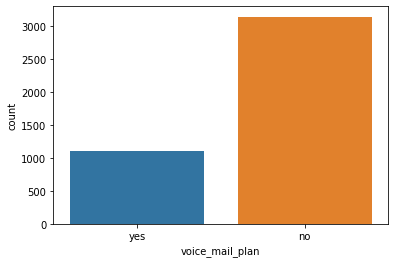

In [32]:
sns.countplot('voice_mail_plan', data=data)

In [33]:
data['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

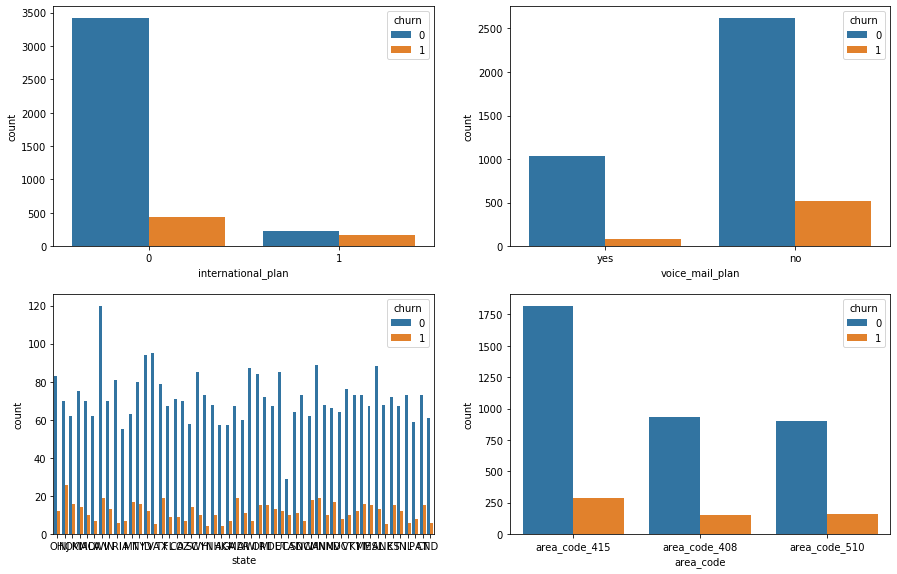

In [34]:
plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
sns.countplot('international_plan', data=data, hue='churn')

plt.subplot(3, 2, 2)
sns.countplot('voice_mail_plan', data=data, hue='churn')

plt.subplot(3, 2, 3)
sns.countplot('state', data=data, hue='churn')

plt.subplot(3, 2, 4)
sns.countplot('area_code', data=data, hue='churn')

<font color='purple'> <b> ** Insights: <br>
    From the countplot of categorical variables with respect to target variable "churn":
    
    
    1. Higher percentage of customers who were enrolled in international plan have left the provider. This might be because
    the provider didn't have specific plans that would benefit the customers with international plan
    2. As already seen, higher % of customers who did not enroll in voice mail plan have left the provider

# Dataset Splitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('churn', axis=1), data['churn'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2975, 19), (1275, 19))

<font color='purple'> <b> ** Dataset Splitting: <br>
    Dataset is split into Train and Test so that, 
    
    1. Models can be built using Training dataset and
    2. Predictions can be done on Test Data and thus accuracy results of model prediction can be known.
    
    Note: However the best model and the best parameters are selected based on the cross validation score and grod search only

# Data Preprocessing

In [36]:
# Segregating predictors into groups for analysis

categorical = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

continuous = [var for var in data.columns if var not in categorical]


print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 16 continuous variables
There are 4 categorical variables


In [37]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')

In [38]:
Churn_preprocess = Pipeline([
    
     # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
        variables= ['number_vmail_messages','total_day_calls', 'total_night_charge'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                        variables=['total_day_calls', 'total_night_charge'])),
    ('imputer_num1', mdi.ArbitraryNumberImputer(arbitrary_number=0,
                                          variables='number_vmail_messages')),
    
    # removing outliers
    ('capper', outr.Winsorizer(
        distribution='skewed', tail='both', fold=3, variables=['total_intl_calls', 'number_customer_service_calls'])),
    
  
    # categorical encoding 
    ('categorical_enc', ce.OneHotCategoricalEncoder(
        top_categories=180, variables=categorical)),
    
    # discretisation 
   ('discretisation', dsc.EqualWidthDiscretiser(bins=7,  
       variables=['total_intl_minutes', 'total_intl_charge','number_vmail_messages'])),
    
    # feature Scaling
    ('scaler', StandardScaler()),

])

<font color='purple'> <b> ** Preoprocessing steps include: <br>
    1. Binary imputation for all predictors with null values. This will insert a column with values 1 and 0, 1 for all observation where there are values and 0 when it is null r contains nan values
    
    
    2. Mean imputation is done for null values only in cols 'total_day_calls' and 'total_night_charge', whereas for column 'number_vmail_messages' arbitrary value of 0 is imputed.
    This is done as most of the cases where null values are present also have their corresponding value in col 'voice_mail_plan' as no, which means they have not opted for voice mail and hence their number of vmail messages can only be 0
    
    
    3. Predictors that had higher % of outliers are removed
    
    
    4. One hot encoding is done for categorical variables
    
    
    5. Standardscalar is used to standardize values as the algorithms like knn , svc may not perform well without scaling as they use distance calculation. 
    
    Among the other scalers Standardscalar is picked as the data has normally distribution for the most part.

In [39]:
Churn_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['number_vmail_messages',
                                                'total_day_calls',
                                                'total_night_charge'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['total_day_calls',
                                              'total_night_charge'])),
                ('imputer_num1',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['number_vmail_messages'])),
                (...
                 OneHotCategoricalEncoder(drop_last=False, top_categories=180,
                                          variables=['state', 'area_code',
                                                     'international_plan',
                                                     'voice_mail_plan'])),
     

<font color='purple'> <b> ** .FIT FUNCTION:
    
    The necessary values to be imputed as per the pre processing steps are calculated based on the Training dataset using the .fit function

In [40]:
# Apply Transformations
X_train=Churn_preprocess.transform(X_train)
X_test=Churn_preprocess.transform(X_test)

<font color='purple'> <b> ** .TRANSFORM FUNCTION:
    
    The values from the Training dataset like the median value for missing values etc., are imputed on the train as well as the test data with the .transform function

# Modelling

## Model training

### Naive Algorithm

In [41]:
dummy_minority = DummyClassifier(strategy='constant', constant = 1)
dummy_minority.fit(X_train, y_train)

pred_least_frequent = dummy_minority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_least_frequent)))
print("Test score: {:.2f}".format(dummy_minority.score(X_test, y_test)))

print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_least_frequent)))

Unique predicted labels: [1]
Test score: 0.14
f1 score dummy: 0.24


<font color='purple'> <b> ** Dummy classifier: <br>
    
    The dummy classifier is used to get the base score against which the score from other models can be compared. Here the dummy classifier used is "always predict 1". Here '1' is the minority class and also the class of interest
    
    
    
    
 <font color='purple'> <b> ** Scoring Method: <br>
    
    The score method is specified as "f1" as we shouldnt use the default scoring method "accuracy". If "accuracy" is used then even the naive model would give an accuracy of 86% since it is an UNBALANCED DATASET with the majority class occupying 86%
    
    
    
<font color='purple'> <b> ** Assumption made: <br>
    
    Why f1 score is used?
    f score is good for unbalanced datasets especially when our interest is in predicting class lables instead of probabilities. Here in our case, we need to predict the class of customer churn which are : "Yes" or "1" and "No" or "0"<br>
    Now our interest being the positive class, we need to decide choosing between the three f scores:<br>
    a. f0.5 - Giving more weightage to Precision than Recall
    b. f1 - Gives equal weightage to both Precision than Recall
    c. f2 - Gives more weightage to Recall
    
    If more weightage is given to Precision, False Positives(FP) will be reduced. In our case reducing FP means reducing the number of customers who will be falsely predicted to leave but who will not. If more weightage is given to Recall, False Negatives(FN) will be reduced. In our case reducing FN means reducing the number of customers who will not be predicted to leave but will actually leave the provider.<br>
    
    Now though in our case it might seem wiser to choose f2 scoring method, I have choosen f1 assuming that cost of FP as well as FN are equal. That is, the cost of falsely predicting a customer to leave and spending money on them is equally important and same as the amount of money lost by falsely predicting a customer that they will not leave and then they  leaving eventually. Hence equal weightage is given for both precision and recall and f1 is choosen.

### Logistic Regression

In [42]:
logreg=LogisticRegression(max_iter=1000)

#define a list of parameters
logreg_param= {'C': [0.1,1,5, 8, 10, 20, 100]}

#apply grid search
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, scoring='f1' )
logreg_grid.fit(X_train,y_train)

# Mean Cross validation Score
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')

#find best parameters
print(f'Logreg parameters: {logreg_grid.best_params_}')

# Check test data set performance
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.3497190966782193
Logreg parameters: {'C': 5}
Train score is 0.3793677204658901
Test score is 0.3114754098360656


### Decision Tree

In [276]:
from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(3,36)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring='f1')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.73

Decision Tree parameters:  {'max_depth': 6}
Decision Tree Performance Train:  0.8300907911802854
Decision Tree Performance Test:  0.7727272727272728


### KNN

In [285]:
knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': range(2,45)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring='f1')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.13

KNN parameters:  {'n_neighbors': 3}
KNN Train Performance:  0.5356576862123613
KNN Test Performance:  0.24892703862660942


### Support Vector Machine

#### SVC Linear

In [297]:
svc_linear = SVC(kernel = 'linear')

#define a list of parameters
param_svc_linear = {'C': [0.8, 1, 1.5, 10, 15],
                   'gamma':[0.0001,0.001,0.1]}

#apply grid search
grid_param_svc_linear = GridSearchCV(svc_linear, param_svc_linear, cv=5, return_train_score = True, scoring='f1')
grid_param_svc_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc_linear.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc_linear.best_params_)

# Check test data set performance
print("SVC Performance train: ", grid_param_svc_linear.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc_linear.score(X_test,y_test))

Best Mean Cross-validation score: 0.02

SVC parameters:  {'C': 1.5, 'gamma': 0.0001}
SVC Performance train:  0.0
SVC Performance test:  0.0


#### SVC Kernel- rbf

In [283]:
svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [1,10,20, 30, 100,150],'gamma':[0.0001,0.001,0.005,0.010,0.1,1]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring='f1')
grid_svc_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel.best_params_)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))

Best Mean Cross-validation score: 0.55
SVC parameters:  {'C': 20, 'gamma': 0.005}
train score:  0.8774193548387097
test score:  0.5733788395904437


#### SVC Kernel-Sigmoid

In [301]:
svc_kernel = SVC(kernel = 'sigmoid')

#define a list of parameters
param_svc_kernel = {'C': [0.001, 0.01,0.1,1,5,10],'gamma':[0.000001, 0.001,0.1,0.25, 1,10]}

#apply grid search
grid_svc_kernel1 = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring='f1')
grid_svc_kernel1.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel1.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel1.best_params_)

print('train score: ', grid_svc_kernel1.score(X_train, y_train))
print('test score: ', grid_svc_kernel1.score(X_test, y_test))

Best Mean Cross-validation score: 0.24
SVC parameters:  {'C': 1, 'gamma': 0.1}
train score:  0.13546798029556653
test score:  0.2006472491909385


#### SVC Kernel- with poly

<font color='purple'> <b> ** SVC when ran with kernels: ('linear', 'poly', 'rbf') using grid search gives very poor result of cv =0. Hence this model should not be considered for further analysis

In [289]:
svc = SVC()

#define a list of parameters
param_svc = {'kernel': ('linear', 'poly', 'rbf'),  
             'C': [0.0001, 0.001, 0.1, 0.15, 0.8, 1, 1.5], 
             'degree': [1, 2, 3], 'gamma': [1e-7, 1e-6, 1e-5, 1e-4]}

#apply grid search
grid_param_svc = GridSearchCV(svc, param_svc, cv=6, return_train_score = True, scoring='f1')
grid_param_svc.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc.best_params_)

# Check test data set performance
print("SVC Performance train: ", grid_param_svc.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc.score(X_test,y_test))

Best Mean Cross-validation score: 0.00

SVC parameters:  {'C': 0.0001, 'degree': 1, 'gamma': 1e-07, 'kernel': 'linear'}
SVC Performance train:  0.0
SVC Performance test:  0.0


## Ensembling

### Random Forest

In [303]:
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 11, 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=6, return_train_score=True,scoring='f1')
rfc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(rfc_grid.best_score_))
print()

#find best parameters
print('Randomforest parameters: ',rfc_grid.best_params_)


# Check test data set performance
print("Train score of Randomforest: ",rfc_grid.score(X_train,y_train))
print("Test score of Randomforest: ",rfc_grid.score(X_test,y_test))

Best Mean Cross-validation score: 0.71

Randomforest parameters:  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 200}
Train score of Randomforest:  0.9454094292803971
Test score of Randomforest:  0.7676056338028169


### Extra Trees

In [302]:
etc= ExtraTreesClassifier(random_state=0)
etc_param = { 
    'n_estimators': [200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [ 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=6, return_train_score=True,scoring='f1')
etc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(etc_grid.best_score_))
print()

#find best parameters
print('Extra-Tree parameters: ',etc_grid.best_params_)


# Check test data set performance
print("Train score of Extra-Tree: ",etc_grid.score(X_train,y_train))
print("Test score of Extra-Tree: ",etc_grid.score(X_test,y_test))

Best Mean Cross-validation score: 0.37

Extra-Tree parameters:  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 300}
Train score of Extra-Tree:  0.8559892328398385
Test score of Extra-Tree:  0.4054054054054054


### Gradient Boosting

In [140]:
gbc= GradientBoostingClassifier(random_state=0)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [80,90,100,110,150],
              'learning_rate' : [0.1, 0.2, 0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring='f1')
gbc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(gbc_grid.best_score_))
print()

#find best parameters
print('Gradient Boost parameters: ',gbc_grid.best_params_)


# Check test data set performance
print("Train score of Gradient Boost: ",gbc_grid.score(X_train,y_train))
print("Test score of Gradient Boost: ",gbc_grid.score(X_test,y_test))


Best Mean Cross-validation score: 0.77

Gradient Boost parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 90}
Train score of Gradient Boost:  0.9336670838548186
Test score of Gradient Boost:  0.8138801261829653


### XgBoost

In [141]:
xgbc= XGBClassifier(random_state=0,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,7,8,9],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.2,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring='f1' )
xgbc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(xgbc_grid.best_score_))
print()

#find best parameters
print('XG Boost parameters: ',xgbc_grid.best_params_)


# Check test data set performance
print("Train score of XG Boost: ",xgbc_grid.score(X_train,y_train))
print("Test score of XG Boost: ",xgbc_grid.score(X_test,y_test))

Best Mean Cross-validation score: 0.80

XG Boost parameters:  {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
Train score of XG Boost:  0.9634146341463414
Test score of XG Boost:  0.8242811501597443


## Model evaluation and testing

In [306]:
# Identifying the top performing models
classifiers={'logis':logreg_grid,
             'knn':grid_knn,
             'dtree':grid_dtree,
             'svc_sig':grid_svc_kernel1,
             'Ksvc':grid_svc_kernel,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
    
# Create a Pandas DataFrame with the mean+std results
f1score_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

# Show the accuracy dataframe

f1score_df.sort_values(by=['mean'], inplace=True,ascending=False)
f1score_df

,model,mean,std
8,xgbc,0.800520,0.037148
7,gbc,0.766654,0.043787
2,dtree,0.728592,0.061147
5,rfc,0.714839,0.053363
6,etc,0.374348,0.058931
0,logis,0.349719,0.036373
3,svc_sig,0.235492,0.072994
4,Ksvc,0.235492,0.072994
1,knn,0.127441,0.025749


### Stacking Classifiers

#### Stacking 1

In [310]:
# Stacking algorithm using the top models
sclf1 = StackingClassifier(estimators=
                                 [('xgbc', xgbc_grid.best_estimator_),
                                  ('gbc', gbc_grid.best_estimator_),
                                  ('dtree', grid_dtree.best_estimator_), 
                                  ('rfc', rfc_grid.best_estimator_), 
                                 ('etc', etc_grid.best_estimator_),     
                              ], final_estimator=LogisticRegression())

sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=6, return_train_score=True, scoring='f1')
sclf1_grid.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf1_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf1_grid.best_params_)


# Check test data set performance
print("Train score : ",sclf1_grid.score(X_train,y_train))
print("Test score : ",sclf1_grid.score(X_test,y_test))

Best Mean Cross-validation score: 0.79

Best parameters:  {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score :  0.9348370927318296
Test score :  0.8333333333333334


#### Stacking 2

In [308]:
# Stacking algorithm using the top models
sclf1 = StackingClassifier(estimators=
                                 [('xgbc', xgbc_grid.best_estimator_),
                                  ('gbc', gbc_grid.best_estimator_),
                                  ('dtree', grid_dtree.best_estimator_), 
                                  ('rfc', rfc_grid.best_estimator_),     
                              ], final_estimator=LogisticRegression())

sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=6, return_train_score=True, scoring='f1')
sclf1_grid.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf1_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf1_grid.best_params_)


# Check test data set performance
print("Train score : ",sclf1_grid.score(X_train,y_train))
print("Test score : ",sclf1_grid.score(X_test,y_test))

Best Mean Cross-validation score: 0.78

Best parameters:  {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score :  0.9321608040201005
Test score :  0.8295819935691319


# Cost Sensitive Algorithms

<font color='purple'> <b> ** Cost Sensitive Algorithms: <br>
    
    We have decided to use "f1" score instead of accuracy since our dataset was imbalanced. However just by changing the evaluation metric the problem will not be solved. Hence cost sensitive algorithms are used.
    
    There are algorithms similar to our basic models except for that when we use: 
    
   " class_weight='balanced'" 
   
    depending on how imbalanced our datset is, corresponding weights will be added to values of our minority class, thus making our predictions better.
   

## Model Training

### Logistic Regression

In [43]:
logreg=LogisticRegression(max_iter=1000, class_weight='balanced')

#define a list of parameters
logreg_param= {'C': [0.1,1,1.5,2,3,4,5,8,10],
               'tol':[1e-4,1e-5,1e-3]}

#apply grid search
logreg_grid_bal = GridSearchCV(logreg, logreg_param,cv=6, return_train_score=True, scoring='f1' )
logreg_grid_bal.fit(X_train,y_train)

# Mean Cross validation Score
print(f'Best Mean Cross Validation Score is {logreg_grid_bal.best_score_}')

#find best parameters
print(f'Logreg parameters: {logreg_grid_bal.best_params_}')

# Check test data set performance
print(f'Train score is {logreg_grid_bal.score(X_train,y_train)}')
print(f'Test score is {logreg_grid_bal.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.4582419075619004
Logreg parameters: {'C': 0.1}
Train score is 0.5044776119402985
Test score is 0.48014440433212996


### Decision Tree

In [313]:
dtree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

#define a list of parameters
param_dtree = {'max_depth': range(3,36)}

#apply grid search
grid_dtree_bal = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring='f1')
grid_dtree_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree_bal.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree_bal.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree_bal.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree_bal.score(X_test,y_test))

Best Mean Cross-validation score: 0.73

Decision Tree parameters:  {'max_depth': 5}
Decision Tree Performance Train:  0.7913043478260869
Decision Tree Performance Test:  0.7679558011049724


### Support Vector Machine

#### SVC Linear

In [320]:
svc_linear = SVC(kernel = 'linear', class_weight='balanced')

#define a list of parameters
param_svc_linear = {'C': [0.8, 1, 1.5, 10, 15],
                   'gamma':[0.0001,0.001,0.1]}

#apply grid search
grid_svc_linear_bal = GridSearchCV(svc_linear, param_svc_linear, cv=5, return_train_score = True, scoring='f1')
grid_svc_linear_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_linear_bal.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_svc_linear_bal.best_params_)

# Check test data set performance
print("SVC Performance train: ", grid_svc_linear_bal.score(X_train,y_train))
print("SVC Performance test: ", grid_svc_linear_bal.score(X_test,y_test))

Best Mean Cross-validation score: 0.46

SVC parameters:  {'C': 15, 'gamma': 0.0001}
SVC Performance train:  0.5084745762711864
SVC Performance test:  0.4820143884892087


#### SVC Kernel- rbf

In [315]:
svc_kernel = SVC(kernel = 'rbf', class_weight='balanced')

#define a list of parameters
param_svc_kernel = {'C': [1,10,20, 30, 100,150],'gamma':[0.0001,0.001,0.005,0.010,0.1,1]}

#apply grid search
grid_svc_kernel_bal = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring='f1')
grid_svc_kernel_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel_bal.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel_bal.best_params_)

print('train score: ', grid_svc_kernel_bal.score(X_train, y_train))
print('test score: ', grid_svc_kernel_bal.score(X_test, y_test))

Best Mean Cross-validation score: 0.57
SVC parameters:  {'C': 100, 'gamma': 0.001}
train score:  0.7604562737642585
test score:  0.6041189931350115


#### SVC Kernel-Sigmoid

In [319]:
svc_kernel = SVC(kernel = 'sigmoid', class_weight='balanced')

#define a list of parameters
param_svc_kernel = {'C': [0.001, 0.01,0.1,1,5,10],'gamma':[0.000001, 0.001,0.1,0.25, 1,10]}

#apply grid search
grid_svc_sig_bal = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring='f1')
grid_svc_sig_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_sig_bal.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_sig_bal.best_params_)

print('train score: ', grid_svc_sig_bal.score(X_train, y_train))
print('test score: ', grid_svc_sig_bal.score(X_test, y_test))

Best Mean Cross-validation score: 0.50
SVC parameters:  {'C': 0.1, 'gamma': 0.001}
train score:  0.5342019543973943
test score:  0.5604395604395604


## Model Ensembling

### Random Forest

In [316]:
rfc =RandomForestClassifier(random_state=0, class_weight='balanced')
rfc_param = { 
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 11, 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy']
}

rfc_grid_bal = GridSearchCV(rfc, rfc_param,cv=6, return_train_score=True,scoring='f1')
rfc_grid_bal.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(rfc_grid_bal.best_score_))
print()

#find best parameters
print('Randomforest parameters: ',rfc_grid_bal.best_params_)


# Check test data set performance
print("Train score of Randomforest: ",rfc_grid_bal.score(X_train,y_train))
print("Test score of Randomforest: ",rfc_grid_bal.score(X_test,y_test))

Best Mean Cross-validation score: 0.74

Randomforest parameters:  {'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 100}
Train score of Randomforest:  0.9245982694684797
Test score of Randomforest:  0.7603833865814698


### Extra Trees

In [317]:
etc= ExtraTreesClassifier(random_state=0, class_weight='balanced')
etc_param = { 
    'n_estimators': [200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [ 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy']
}
etc_grid_bal = GridSearchCV(etc, etc_param,cv=6, return_train_score=True,scoring='f1')
etc_grid_bal.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(etc_grid_bal.best_score_))
print()

#find best parameters
print('Extra-Tree parameters: ',etc_grid_bal.best_params_)


# Check test data set performance
print("Train score of Extra-Tree: ",etc_grid_bal.score(X_train,y_train))
print("Test score of Extra-Tree: ",etc_grid_bal.score(X_test,y_test))

Best Mean Cross-validation score: 0.67

Extra-Tree parameters:  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 200}
Train score of Extra-Tree:  0.9368541905855339
Test score of Extra-Tree:  0.713091922005571


### XgBoost

#### XgBoost with class weight balanced

In [321]:
xgbc= XGBClassifier(random_state=0,early_stopping_rounds=2,objective= 'binary:logistic',class_weight='balanced')
xgbc_param = {
              'max_depth' : [2,4,6,7,8,9],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.2,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid_bal = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring='f1' )
xgbc_grid_bal.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(xgbc_grid_bal.best_score_))
print()

#find best parameters
print('XG Boost parameters: ',xgbc_grid_bal.best_params_)


# Check test data set performance
print("Train score of XG Boost: ",xgbc_grid_bal.score(X_train,y_train))
print("Test score of XG Boost: ",xgbc_grid_bal.score(X_test,y_test))

Best Mean Cross-validation score: 0.80

XG Boost parameters:  {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
Train score of XG Boost:  0.9634146341463414
Test score of XG Boost:  0.8242811501597443


#### XgBoost with class weight balanced

<font color='purple'> <b> **  'scale_pos_weight' is the ratio of number of negative class to the positive class.
    
    Since our dataset has 3652 observations of negative class and 598 observations of positive class, then ideal value of scale_pos_weight should be closer to 16.

In [49]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75],
}

#apply grid search
grid_xgboost_bal = GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_xgboost_bal.fit(X_train,y_train)

print("Best parameters: {}".format(grid_xgboost_bal.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost_bal.best_score_))

# Check test data set performance
print("Train score of XG Boost: ",grid_xgboost_bal.score(X_train,y_train))
print("Test score of XG Boost: ",grid_xgboost_bal.score(X_test,y_test))

Best parameters: {'scale_pos_weight': 10}
Best Mean cross-validation score: 0.79
Train score of XG Boost:  1.0
Test score of XG Boost:  0.8348348348348349


## Bagged decision trees with random undersampling for imbalanced classification

In [51]:
# define model
model = BalancedBaggingClassifier()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

# summarize performance
print('Mean f1 score: %.3f' % mean(scores))

Mean f1 score: 0.730


# Data Sampling Algorithms - Oversampling

<font color='purple'> <b> ** As already discussed majority of customers didn't enroll in voice mail plan

 <b> <font color='purple'> ** Data Sampling Algorithms - Oversampling:
        
    Similar to cost sensitive algorithms, these are also used to overcome the problems of imbalanced dataset. 
    SMOTE, SVMSMOTE, and ADASYN are different ways in which oversampling can be done, so that ourdatset contains equal number of 0s and 1s or equal amount of majority and minority classes.

## Logistic Regression with oversampling

In [119]:
# GridSearch with oversampling
pipe_log_smote = Pipeline([('smote', SMOTE()), ('model',LogisticRegression(max_iter=1000))])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__C':  [5, 8, 10, 20, 100, 150, 200],
    'model__penalty':  ['l1','l2'],
}

#apply grid search
grid_smote_log = GridSearchCV(pipe_log_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_smote_log.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_smote_log.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_smote_log.best_params_))

# Check test data set performance
print(f'Train score is {grid_smote_log.score(X_train,y_train)}')
print(f'Test score is {grid_smote_log.score(X_test,y_test)}')

Best Mean cross-validation score: 0.47
Best parameters: {'model__C': 100, 'model__penalty': 'l2', 'smote__k_neighbors': 2}
Train score is 0.5011565150346954
Test score is 0.47897623400365635


## Decision Tree with oversampling

### Decision Tree with smote

In [121]:
# GridSearch with oversampling
pipe_decis_smote = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier(random_state=0))])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__max_depth':   range(3,36),
}

#apply grid search
grid_smote_deci = GridSearchCV(pipe_decis_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_smote_deci.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_smote_deci.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_smote_deci.best_params_))

# Check test data set performance
print(f'Train score is {grid_smote_deci.score(X_train,y_train)}')
print(f'Test score is {grid_smote_deci.score(X_test,y_test)}')

Best Mean cross-validation score: 0.72
Best parameters: {'model__max_depth': 6, 'smote__k_neighbors': 1}
Train score is 0.8421052631578947
Test score is 0.7648725212464589


### Decision Tree with SVMsmote

In [122]:
pipe_dec_svmsmote = Pipeline([('svmsmote', SVMSMOTE()), ('model', DecisionTreeClassifier(random_state=0))])

param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__max_depth': range(3,36),
}

#apply grid search
grid_smote_deci1 = GridSearchCV(pipe_dec_svmsmote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_smote_deci1.fit(X_train,y_train)


# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_smote_deci1.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_smote_deci1.best_params_))

# Check test data set performance
print(f'Train score is {grid_smote_deci1.score(X_train,y_train)}')
print(f'Test score is {grid_smote_deci1.score(X_test,y_test)}')

Best Mean cross-validation score: 0.74
Best parameters: {'model__max_depth': 7, 'svmsmote__k_neighbors': 5}
Train score is 0.8173302107728337
Test score is 0.7485714285714286


### Decision Tree with ADASYN

In [123]:
pipe_deci_adasyn = Pipeline([('adasyn', ADASYN()), ('model', DecisionTreeClassifier(random_state=0))])


param_grid = {
    # try different feature engineering parameters
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__max_depth': range(3,36),
}

#apply grid search
grid_adasyn_deci = GridSearchCV(pipe_deci_adasyn, param_grid, cv=8, n_jobs=2, scoring='f1')
grid_adasyn_deci.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_adasyn_deci.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_adasyn_deci.best_params_))

# Check test data set performance
print(f'Train score is {grid_adasyn_deci.score(X_train,y_train)}')
print(f'Test score is {grid_adasyn_deci.score(X_test,y_test)}')

Best Mean cross-validation score: 0.72
Best parameters: {'adasyn__n_neighbors': 2, 'model__max_depth': 6}
Train score is 0.7777777777777778
Test score is 0.6752577319587629


## KNN with oversampling

In [125]:
pipe_knn_smote = Pipeline([('smote', SMOTE()), ('model',KNeighborsClassifier())])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__n_neighbors': range(2,45),
}

#apply grid search
grid_smote_knn = GridSearchCV(pipe_knn_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_smote_knn.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_smote_knn.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_smote_knn.best_params_))

# Check test data set performance
print(f'Train score is {grid_smote_knn.score(X_train,y_train)}')
print(f'Test score is {grid_smote_knn.score(X_test,y_test)}')

Best Mean cross-validation score: 0.34
Best parameters: {'model__n_neighbors': 6, 'smote__k_neighbors': 3}
Train score is 0.6484375
Test score is 0.3646408839779005


## Support Vector Machine with oversampling

### SVC Linear

In [57]:
pipe_SVCL_smote = Pipeline([('smote', SMOTE()), ('model', SVC(kernel = 'linear'))])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__C': [0.8, 1, 1.5, 10, 15],
    'model__gamma':[0.0001,0.001,0.1],
    
}

#apply grid search
grid_SVCL_smote = GridSearchCV(pipe_SVCL_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_SVCL_smote.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_SVCL_smote.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_SVCL_smote.best_params_))

# Check test data set performance
print(f'Train score is {grid_SVCL_smote.score(X_train,y_train)}')
print(f'Test score is {grid_SVCL_smote.score(X_test,y_test)}')

Best Mean cross-validation score: 0.47
Best parameters: {'model__C': 15, 'model__gamma': 0.1, 'smote__k_neighbors': 5}
Train score is 0.49557522123893805
Test score is 0.47142857142857136


### SVC Kernel- rbf (SMOTE)

In [60]:
pipe_SVCK_smote1 = Pipeline([('smote', SMOTE()), ('model',SVC(kernel = 'rbf'))])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__C': [1,10,20, 50, 100,150, 200],
    'model__gamma':[0.0001,0.001,0.005,0.010,0.1,1],
    
}

#apply grid search
grid_SVCK_smote1 = GridSearchCV(pipe_SVCK_smote1, param_grid, cv=6, n_jobs=2, scoring='f1')
grid_SVCK_smote1.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_SVCK_smote1.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_SVCK_smote1.best_params_))

# Check test data set performance
print(f'Train score is {grid_SVCK_smote1.score(X_train,y_train)}')
print(f'Test score is {grid_SVCK_smote1.score(X_test,y_test)}')

Best Mean cross-validation score: 0.53
Best parameters: {'model__C': 150, 'model__gamma': 0.001, 'smote__k_neighbors': 1}
Train score is 0.8045738045738046
Test score is 0.5616797900262467


### SVC Kernel- rbf (SVMSMOTE)

In [64]:
pipe_SVCK_smote2 = Pipeline([('svmsmote', SVMSMOTE()), ('model',SVC(kernel = 'rbf'))])

param_grid = {
    # try different feature engineering parameters
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__C': [1,10,20, 50, 100,150, 200],
    'model__gamma':[0.0001,0.001,0.005,0.010,0.1,1],
}

#apply grid search
grid_SVCK_smote2 = GridSearchCV(pipe_SVCK_smote2, param_grid, cv=6, n_jobs=2, scoring='f1')
grid_SVCK_smote2.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_SVCK_smote2.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_SVCK_smote2.best_params_))

# Check test data set performance
print(f'Train score is {grid_SVCK_smote2.score(X_train,y_train)}')
print(f'Test score is {grid_SVCK_smote2.score(X_test,y_test)}')

Best Mean cross-validation score: 0.57
Best parameters: {'model__C': 100, 'model__gamma': 0.001, 'svmsmote__k_neighbors': 1}
Train score is 0.8073394495412844
Test score is 0.6028985507246377


### SVC Kernel-Sigmoid

In [59]:
pipe_SVCSig_smote = Pipeline([('smote', SMOTE()), ('model', SVC(kernel = 'sigmoid'))])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__C': [0.001, 0.01,0.1,1,5,10],
    'model__gamma':[0.000001, 0.001,0.1,0.25, 1,10],
    
}

#apply grid search
grid_SVCK_smote = GridSearchCV(pipe_SVCSig_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_SVCK_smote.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_SVCK_smote.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_SVCK_smote.best_params_))

# Check test data set performance
print(f'Train score is {grid_SVCK_smote.score(X_train,y_train)}')
print(f'Test score is {grid_SVCK_smote.score(X_test,y_test)}')

Best Mean cross-validation score: 0.49
Best parameters: {'model__C': 0.01, 'model__gamma': 1e-06, 'smote__k_neighbors': 5}
Train score is 0.5112107623318386
Test score is 0.5099778270509978


## Random Forest with oversampling

### Random Forest with SMOTE

In [49]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier(random_state=0))])

param_grid = {
 
    'smote__k_neighbors': [1,2,3,4,5],
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [10, 11, 12, 13, 14, 15, 16],
    'model__criterion' :['gini', 'entropy']
}

#apply grid search
grid_rand_smote = GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_rand_smote.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_rand_smote.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_rand_smote.best_params_))

# Check test data set performance
print(f'Train score is {grid_rand_smote.score(X_train,y_train)}')
print(f'Test score is {grid_rand_smote.score(X_test,y_test)}')

Best Mean cross-validation score: 0.73
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 15, 'model__max_features': 'auto', 'model__n_estimators': 500, 'smote__k_neighbors': 5}
Train score is 0.9608801955990219
Test score is 0.7582089552238805


### Random Forest with SVMSMOTE

In [62]:
pipe_rand_smote1 = Pipeline([('svmsmote', SVMSMOTE()), ('model', RandomForestClassifier(random_state=0))])

param_grid = {
 
   'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [10, 11, 12, 13, 14, 15, 16],
    'model__criterion' :['gini', 'entropy']
    
}

#apply grid search
grid_rand_smote1 = GridSearchCV(pipe_rand_smote1, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_rand_smote1.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_rand_smote1.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_rand_smote1.best_params_))

# Check test data set performance
print(f'Train score is {grid_rand_smote1.score(X_train,y_train)}')
print(f'Test score is {grid_rand_smote1.score(X_test,y_test)}')

Best Mean cross-validation score: 0.74
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__n_estimators': 200, 'svmsmote__k_neighbors': 3}
Train score is 0.9646772228989038
Test score is 0.8115015974440895


## XgBoost with oversampling

### XgBoost with SMOTE

In [53]:
pipe_xgbc_smote = Pipeline([('smote', SMOTE()), 
                            ('model',XGBClassifier(random_state=0))])

param_grid = {
 
    'smote__k_neighbors': [1,2,3,4,5],
    'model__learning_rate' : [0.1,0.2,0.6,0.8],
    'model__min_child_weight' : [1,3,5,7],
   
}

#apply grid search
grid_xgbc_smote = GridSearchCV(pipe_xgbc_smote, param_grid, cv=5, n_jobs=2, scoring='f1')
grid_xgbc_smote.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_xgbc_smote.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_xgbc_smote.best_params_))

# Check test data set performance
print(f'Train score is {grid_xgbc_smote.score(X_train,y_train)}')
print(f'Test score is {grid_xgbc_smote.score(X_test,y_test)}')

Best Mean cross-validation score: 0.79
Best parameters: {'model__learning_rate': 0.1, 'model__min_child_weight': 5, 'smote__k_neighbors': 2}
Train score is 0.9111389236545682
Test score is 0.8012422360248447


### XgBoost with SVMSMOTE

In [63]:
pipe_xgbc_smote1 = Pipeline([('svmsmote', SVMSMOTE()), 
                            ('model',XGBClassifier(random_state=0))])

param_grid = {
 
    'svmsmote__k_neighbors': [1,2,3,4,5],
    'model__learning_rate' : [0.1,0.2,0.6,0.8],
    'model__min_child_weight' : [1,3,5,7],
   
}

#apply grid search
grid_xgbc_smote1 = GridSearchCV(pipe_xgbc_smote1, param_grid, cv=6, n_jobs=2, scoring='f1')
grid_xgbc_smote1.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_xgbc_smote1.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_xgbc_smote1.best_params_))

# Check test data set performance
print(f'Train score is {grid_xgbc_smote1.score(X_train,y_train)}')
print(f'Test score is {grid_xgbc_smote1.score(X_test,y_test)}')

Best Mean cross-validation score: 0.80
Best parameters: {'model__learning_rate': 0.1, 'model__min_child_weight': 5, 'svmsmote__k_neighbors': 5}
Train score is 0.9205548549810844
Test score is 0.7889908256880733


### XgBoost with ADASYN

In [134]:
pipe_xgbc_ada = Pipeline([('adasyn', ADASYN()), 
                            ('model',XGBClassifier(random_state=0))])

param_grid = {
 
    'adasyn__n_neighbors': [1,2,3,4,5],
    'model__learning_rate' : [0.1,0.2,0.6,0.8],
    'model__min_child_weight' : [1,3,5,7],
   
}

#apply grid search
grid_xgbc_ada = GridSearchCV(pipe_xgbc_ada, param_grid, cv=6, n_jobs=2, scoring='f1')
grid_xgbc_ada.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean cross-validation score: {:.2f}".format(grid_xgbc_ada.best_score_))

#find best parameters
print("Best parameters: {}".format(grid_xgbc_ada.best_params_))

# Check test data set performance
print(f'Train score is {grid_xgbc_ada.score(X_train,y_train)}')
print(f'Test score is {grid_xgbc_ada.score(X_test,y_test)}')

Best Mean cross-validation score: 0.78
Best parameters: {'adasyn__n_neighbors': 1, 'model__learning_rate': 0.1, 'model__min_child_weight': 1}
Train score is 0.9443757725587144
Test score is 0.8024316109422492


## Easy Ensemble Classifier with oversampling

### Easy Ensemble Classifier with base estimator - Adaboost

In [129]:
eec = EasyEnsembleClassifier(random_state=0)


#define a list of parameters
param_eec = {'n_estimators': [10, 20, 30]}

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#apply grid search
grid_eec = GridSearchCV(eec, param_eec, cv=cv, return_train_score = True, scoring='f1')
grid_eec.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_eec.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_eec.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_eec.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_eec.score(X_test,y_test))

Best Mean Cross-validation score: 0.55

Decision Tree parameters:  {'n_estimators': 20}
Decision Tree Performance Train:  0.6051779935275081
Decision Tree Performance Test:  0.5645161290322581


### Easy Ensemble Classifier with base estimator - xgboost

In [131]:
model = EasyEnsembleClassifier(base_estimator=XGBClassifier(),n_estimators=20)

#define a list of parameters
param_eec = {'n_estimators': [10, 20, 30]}

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#apply grid search
grid_eec1 = GridSearchCV(model, param_eec, cv=cv, return_train_score = True, scoring='f1')
grid_eec1.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_eec1.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_eec1.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_eec1.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_eec1.score(X_test,y_test))

Best Mean Cross-validation score: 0.72

Decision Tree parameters:  {'n_estimators': 20}
Decision Tree Performance Train:  0.8284600389863548
Decision Tree Performance Test:  0.7142857142857142


## Model evaluation for Data Sampling algorithms

In [136]:
# Identifying the top performing models when class weights are balanced
classifiers={'logis_over':grid_smote_log,
             'dtree_over_sm':grid_smote_deci,
             'dtree_over_svmsm':grid_smote_deci1,
             'dtree_over_ada':grid_adasyn_deci,
             'KNN_over':grid_smote_knn,
             'svcl_over':grid_SVCL_smote,
             'svcsig_over':grid_SVCK_smote,
             'Ksvc_over_sm':grid_SVCK_smote1,
             'Ksvc_over_svmsm':grid_SVCK_smote2,
             'rfc_over_sm': grid_rand_smote,
             'rfc_over_svmsm': grid_rand_smote1,
              'eec-adaboost':grid_eec,
              'eec-xgboost':grid_eec1,
              'xgbc_over_svmsm':grid_xgbc_smote1,
             'xgbc_over_adasyn':grid_xgbc_ada,
             'xgbc_over_sm': grid_xgbc_smote}

results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
    
# Create a Pandas DataFrame with the mean+std results
f1score_bal_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

# Show the accuracy dataframe

f1score_bal_df.sort_values(by=['mean'], inplace=True,ascending=False)
f1score_bal_df

,model,mean,std
13,xgbc_over_svmsm,0.797818,0.022916
15,xgbc_over_sm,0.788706,0.019883
14,xgbc_over_adasyn,0.783406,0.027555
2,dtree_over_svmsm,0.742067,0.016030
10,rfc_over_svmsm,0.736860,0.040080
9,rfc_over_sm,0.730122,0.040968
1,dtree_over_sm,0.722459,0.058116
3,dtree_over_ada,0.716377,0.058597
12,eec-xgboost,0.715361,0.043557
8,Ksvc_over_svmsm,0.571533,0.031743


## Stacking Classifiers with oversampling 

### Top 4 best models with Logistic Regression as final estimator

In [132]:
# Stacking algorithm using the top models
sclf_over = StackingClassifier(estimators=
                                 [('xgbc_over_svmsm', grid_xgbc_smote1.best_estimator_),
                                  ('xgbc_over_sm', grid_xgbc_smote.best_estimator_),
                                  ('dtree_over_svmsm', grid_smote_deci1.best_estimator_), 
                                  ('rfc_over_svmsm', grid_rand_smote1.best_estimator_),    
                              ], final_estimator=LogisticRegression())

sclfover_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }

sclf_over_grid = GridSearchCV(sclf_over, sclfover_param,cv=6, return_train_score=True, scoring='f1')
sclf_over_grid.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_over_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_over_grid.best_params_)


# Check test data set performance
print("Train score : ",sclf_over_grid.score(X_train,y_train))
print("Test score : ",sclf_over_grid.score(X_test,y_test))

Best Mean Cross-validation score: 0.77

Best parameters:  {'final_estimator__C': 0.2, 'stack_method': 'predict_proba'}
Train score :  0.9294710327455921
Test score :  0.7948717948717948


### Top 5 best models with XG boost as final estimator

In [138]:
# Stacking algorithm using the top models
sclf_over1 = StackingClassifier(estimators=
                                 [('xgbc_over_svmsm', grid_xgbc_smote1.best_estimator_),
                                  ('xgbc_over_sm', grid_xgbc_smote.best_estimator_),
                                  ('xgbc_over_adasyn', grid_xgbc_ada.best_estimator_),
                                  ('dtree_over_svmsm', grid_smote_deci1.best_estimator_), 
                                  ('rfc_over_svmsm', grid_rand_smote1.best_estimator_),    
                              ], final_estimator=XGBClassifier(random_state=0))

sclfover1_param = {
              'final_estimator__learning_rate' : [0.1,0.2,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,5,7],
              'stack_method':['auto', 'predict_proba']
             }

sclf_over_grid1 = GridSearchCV(sclf_over1, sclfover1_param,cv=6, return_train_score=True, scoring='f1')
sclf_over_grid1.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_over_grid1.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_over_grid1.best_params_)


# Check test data set performance
print("Train score : ",sclf_over_grid1.score(X_train,y_train))
print("Test score : ",sclf_over_grid1.score(X_test,y_test))

Best Mean Cross-validation score: 0.78

Best parameters:  {'final_estimator__learning_rate': 0.2, 'final_estimator__min_child_weight': 3, 'stack_method': 'predict_proba'}
Train score :  0.9049429657794676
Test score :  0.7712418300653595


# Overall best models

In [152]:
vclf1 = VotingClassifier(estimators=
                               [('dtree_over_svmsm',grid_smote_deci1.best_estimator_),
                                  ('rfc_over_svmsm', grid_rand_smote1.best_estimator_),
                                  ('xgbc_over_svmsm', grid_xgbc_smote1.best_estimator_), 
                                  ('xgbc', xgbc_grid.best_estimator_), 
                                 ('gbc', gbc_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param, cv=8, return_train_score=True, scoring='f1')
vclf1_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(vclf1_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',vclf1_grid.best_params_)


# Check test data set performance
print("Train score : ",vclf1_grid.score(X_train,y_train))
print("Test score : ",vclf1_grid.score(X_test,y_test))


Best Mean Cross-validation score: 0.80

Best parameters:  {'voting': 'hard'}
Train score :  0.9414694894146949
Test score :  0.83125
